In [2]:
from  geopy.geocoders import Nominatim
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

COMMON_DIR = os.path.join(os.pardir, 'common')
sys.path.insert(1, COMMON_DIR)
import data_retreiver



In [20]:
data_retreiver.download_datasets()

C:\Users\Desmond\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\Desmond\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\Desmond\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\Desmond\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unveri

In [4]:
df_raw = pd.read_csv("all_parcel_raw.csv")
df_assessments = pd.read_csv("all_parcel_assessments.csv")
df_names = pd.read_csv("all_parcel_names.csv")
df_sales = pd.read_csv("all_parcel_sales.csv")

C:\Users\Desmond\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9,28,42,43,80,81,105,110,112,123,124) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
is_singlefamily = df_raw["PropertyUse"] == 'Single family'
is_singlefamily

0        False
1        False
2        False
3        False
4        False
         ...  
80161    False
80162    False
80163    False
80164    False
80165    False
Name: PropertyUse, Length: 80166, dtype: bool

In [80]:
parcel.to_csv (r'C:\Users\Desmond\Documents\GitHub\code\scratch\test1.csv', index = False, header=True)

In [6]:
df_new_raw = df_raw[is_singlefamily]
parcel = df_new_raw.filter(items=['Parcel'])


parcel

Parcel
32     71002302108
33     71002302116
34     71002302124
35     71002302132
36     71002303015
...            ...
80048  71001416124
80049  71001416132
80050  71001416140
80060  71002102029
80063  71002102061

[47606 rows x 1 columns]

In [97]:
df_new_assessment = df_assessments[["Parcel","Total_Assessment"]]
df_new_assessment



Parcel  Total_Assessment
0                0                 0
1      60802307997              5000
2      70835124359              2000
3      60802112023            287400
4      70813307183            381400
...            ...               ...
80062  81028119320             75700
80063  70816324019            442800
80064  80924427043            175400
80065  70833119154                 0
80066  70923413987              5000

[80067 rows x 2 columns]

In [101]:
ans = pd.merge(parcel, df_new_assessment, on =['Parcel'], how='inner')
ans.head()

ans.to_csv (r'C:\Users\Desmond\Documents\GitHub\code\scratch\single_family_total_assessment.csv', index = False, header=True)

In [22]:
names = pd.merge(parcel, df_names, on =['Parcel'])
names
names.to_csv (r'C:\Users\Desmond\Documents\GitHub\code\scratch\single_family_names.csv', index = False, header=True)


In [7]:
sales = pd.merge(parcel, df_sales, on =['Parcel'])
sales
sales.to_csv (r'C:\Users\Desmond\Documents\GitHub\code\scratch\single_family_sales.csv', index = False, header=True)

In [156]:
ans2 = pd.merge(parcel, df_assessments, on =['Parcel'], how='inner')
ans2.head()

ans2.to_csv (r'C:\Users\Desmond\Documents\GitHub\code\scratch\single_family_total_assessment2.csv', index = False, header=True)

In [197]:
values = ans["Total_Assessment"]
print(values)


0          28200
1          15200
2          15200
3          17500
4         230600
5         237800
6         232100
7         232100
8         232900
9         248500
10        237000
11        245000
12        248000
13        238700
14        239800
15        227800
16        234300
17        249900
18        233600
19        242000
20        234900
21        234900
22        239400
23        237000
24        236900
25        237500
26        239700
27        246000
28        242800
29        242800
30        246000
31        250500
32        235300
33        237300
34        343100
35        302800
36        383100
37        298900
38        344800
39        289000
40        305200
41        321200
42        408500
43        295100
44        329900
45        298900
46           100
47           100
48        317700
49        315000
50        305200
51        255800
52        306000
53        288800
54        298400
55        273900
56        278400
57        268600
58        2868

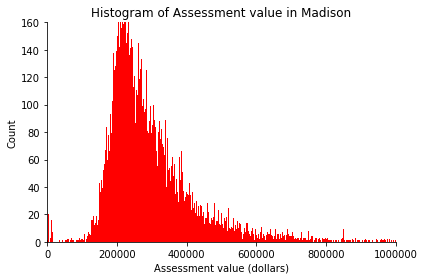

In [179]:
fig, ax = plt.subplots()

plt.hist(values, bins=5000, histtype= 'bar', color = 'red')
plt.xlim(0, 1000000)
plt.ylim(0,160)
plt.ylabel('Count')
plt.xlabel('Assessment value (dollars)')
plt.title("Histogram of Assessment value in Madison");
fig.tight_layout()


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

This time we decided to switch up our topic and focus into racial tax assemssment in Madison. In this section, we decided to filter our data based on property use e.g. Condominium, Restaurant, apartment, single family and explore into the total assessment value for single family in madison. We can observe that the assessment value center at approximately $250000, which can serve as a referencing point for us so that in the future we can look into the racial disparity around that specific value. To explore the histogram further, we made a Cumulative Distribution Function of assessment value. We can observe that the cumulative probability peaked very early on in the x-axis, that means the cumulative probability that a single family's assessment value is $500000 or less is approximately at 0.9, which lines up with our observation from the historgram that assessment value center at approximately $250000.

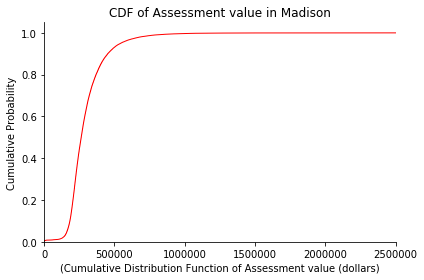

In [183]:
fig, ax = plt.subplots()

plt.hist(values, bins=5000, histtype= 'step', color = 'red', cumulative=True, density=True)
plt.xlim(0, 2500000)
plt.ylabel('Cumulative Probability')
plt.xlabel('(Cumulative Distribution Function of Assessment value (dollars)')
plt.title("CDF of Assessment value in Madison");
fig.tight_layout()


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

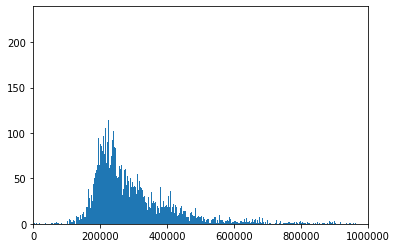

In [152]:
plt.hist(values, bins = 10000)
plt.xlim(0, 1000000)
plt.show()

In [437]:
address = ["5918 Carter Moon "]


df = pd.DataFrame(address, columns=['Street'])
df

empty_df =  pd.DataFrame([], columns=['latitude', 'longitude'])

df.iloc[0]

Street    5918 Carter Moon 
Name: 0, dtype: object

In [438]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent= "andriod")

size = teeext.size

for i in range(0,50):
  location = geolocator.geocode(teeext[i])
  empty_df = empty_df.append({'latitude' : location.latitude , 'longitude' : location.longitude}, ignore_index=True)


range(0, 1000)

In [439]:
empty_df

latitude  longitude
0   43.100770 -89.269457
1   43.100770 -89.269457
2   43.100770 -89.269457
3   43.100770 -89.269457
4   43.100770 -89.269457
5   43.100770 -89.269457
6   43.100770 -89.269457
7   43.100770 -89.269457
8   43.100770 -89.269457
9   43.100770 -89.269457
10  43.100770 -89.269457
11  43.100770 -89.269457
12  43.100770 -89.269457
13  43.100770 -89.269457
14  43.100770 -89.269457
15  43.100770 -89.269457
16  43.100770 -89.269457
17  43.100770 -89.269457
18  43.100770 -89.269457
19  42.473861 -88.311272
20  43.098929 -89.295742
21  52.926931  -1.216329
22  42.473664 -88.310148
23  43.107866 -72.517664
24  42.278490 -71.071018
25  42.278490 -71.071018
26  42.278490 -71.071018
27  42.278490 -71.071018
28  42.278490 -71.071018
29  42.278490 -71.071018
30  42.278490 -71.071018
31  42.278490 -71.071018
32  35.706446 -88.853879
33  35.706442 -88.853884
34  35.702605 -88.853984
35  35.702572 -88.853981
36  36.570356 -81.310294
37  36.570374 -81.310288
38  36.570409 -81.310276
39  36.570427 -81.310270
40  36.570463 -81.310258
41  36.570481 -81.310252
42  36.570516 -81.310241
43  36.570534 -81.310235
44  36.570570 -81.310223
45  36.570588 -81.310217
46  36.570624 -81.310205
47  36.570641 -81.310199
48  36.570679 -81.310193
49  36.570697 -81.310192

In [226]:
teeext

0                         121 Metro Ter 
1                         121 Metro Ter 
2                         121 Metro Ter 
3                         121 Metro Ter 
4                         121 Metro Ter 
5                         121 Metro Ter 
6                         121 Metro Ter 
7                         121 Metro Ter 
8                         121 Metro Ter 
9                         121 Metro Ter 
10                        121 Metro Ter 
11                        121 Metro Ter 
12                        121 Metro Ter 
13                        121 Metro Ter 
14                        121 Metro Ter 
15                        121 Metro Ter 
16                        121 Metro Ter 
17                        121 Metro Ter 
18                        121 Metro Ter 
19                     5800 Milwaukee St
20                     5622 Milwaukee St
21                   5801 Commercial Ave
22                     5709 Milwaukee St
23                         116 Milky Way
24              

In [212]:
text = "121 Metro Ter Unit 109"
sep = 'Unit'
rest = text.split(sep, 1)[0]
rest

'121 Metro Ter '

In [415]:
teeext = df_raw["Address"].str.split("Unit", n = 1, expand = True)[0]
teeext[237] = '5918 Carter Moon'
teeext[238] = '5926 Carter Moon'


In [427]:
teeext = teeext.str.split("Pass", n = 1, expand = True)[0]
teeext

0                         121 Metro Ter 
1                         121 Metro Ter 
2                         121 Metro Ter 
3                         121 Metro Ter 
4                         121 Metro Ter 
5                         121 Metro Ter 
6                         121 Metro Ter 
7                         121 Metro Ter 
8                         121 Metro Ter 
9                         121 Metro Ter 
10                        121 Metro Ter 
11                        121 Metro Ter 
12                        121 Metro Ter 
13                        121 Metro Ter 
14                        121 Metro Ter 
15                        121 Metro Ter 
16                        121 Metro Ter 
17                        121 Metro Ter 
18                        121 Metro Ter 
19                     5800 Milwaukee St
20                     5622 Milwaukee St
21                   5801 Commercial Ave
22                     5709 Milwaukee St
23                         116 Milky Way
24              